# Stabilities and accuracy in time. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
import matplotlib as mpl
mpl.rc('lines', linewidth=2)

from nm_lib import nm_lib as nm

def u_0(x: np.ndarray, t: float = 0) -> np.ndarray:
    r"""
    Initial condition for the advection equation.

    Parameters
    ----------
    x : `array`
        the x-axis.
    t : `float`
        the time.
    
    Returns
    -------
    `array`
        the initial condition.
    """
    return A * ( np.tanh((x + x_c) / W) - np.tanh((x - x_c) / W) )

In [2]:
# Setup for animations

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def init(): 
    """Initialize animation"""
    axes.plot(xx,unnt[:,0])

def animate_lim(i):
    """Animate the solution with a fixed y-axis limit"""
    axes.clear()
    axes.plot(xx,unnt[:,i])
    axes.set_title('t=%.2f'%t[i])
    axes.set_ylim(-0.1, 1.1) 

def animate(i):
    """Animate the solution with dynamic axis limits"""
    axes.clear()
    axes.plot(xx,unnt[:,i])
    axes.set_title('t=%.2f'%t[i])

In [3]:
A = 0.02
x_c = 0.7 
W = 0.1

x0 = -1.4
xf = 2.0

tf = 100

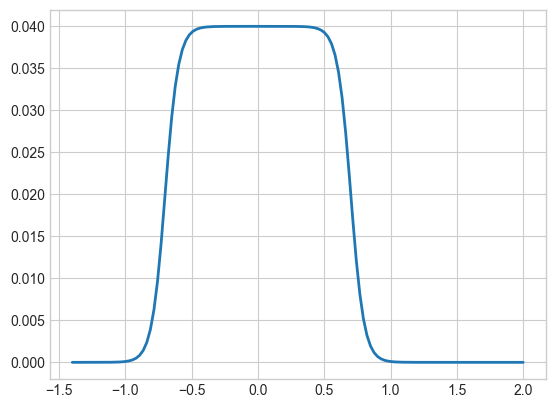

In [4]:
nx = 128
nt = 200

xx = np.linspace(x0, xf, nx)
tt = np.linspace(0, tf, nt)

plt.plot(xx, u_0(xx))

> LET SOL EVOLVE AND EXPLAIN

Lets consider same setup as in [ex_3a](https://github.com/AST-Course/AST5110/blob/main/ex_3a.ipynb) Burgers’ equation, i.e.,

$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = 0   \tag{1}$$ 

for the domain $x \in (x_0, x_f)$ with $x_0 = −1.4$, $x_f = 2.0$ with initial condition:

$$u(x,t=0) = A\left[\tanh\left(\frac{x+x_c}{W}\right)-\tanh\left(\frac{x-x_c}{W}\right)\right]   \tag{2}$$

whereby $A = 0.02$ , $x_c = 0.70$, $W = 0.1$. Let the solution evolve until time $t_f = 100$. Explain in physical (or mathematical) terms the solution you get. However, let's now implement a new time-step method. 

Add the following method to your library and run the previous simulation. 

$$u^{n+1}_j = \frac{1}{2}(u^n_{j+1} + u^n_{j-1}) - \frac{v \Delta t}{2 \Delta x}(u^n_{j+1} - u^n_{j-1})$$

Apply von Neumann stability analysis to the expression above. The stability condition $|\xi(k)|^2 \leq 1$ leads to the famous Courant-Friedrichs-Lewy (CFL) stability. 

Add this to your library and solve the previous simulation imposing the CFL condition. For this exercise, fill in `nm_lib` the function `evolv_Lax_uadv_burgers`. 

In [8]:
# Define the domain 
x0 = -2.6
xf = 2.6

nx = 128
nt = 50
xx = np.linspace(x0, xf, nx) 

t, unnt = nm.evolv_Lax_uadv_burgers(xx, u_0(xx), nt, ddx=nm.deriv_dnw, bnd_limits=[0, 1])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
anim = FuncAnimation(fig, animate, interval=20, frames=nt, init_func=init)
plt.close(); HTML(anim.to_jshtml())

/Users/alinebrunvoll/Documents/AST5110/nm_lib/nm_lib/nm_lib.py:536: RuntimeWarning: divide by zero encountered in divide
  return np.min(dx / np.abs(a))


## 1- Diffusive. 

Redo the exercise [ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and compare the two methods, i.e., one from 
[ex_2b](https://github.com/AST-Course/AST5110/blob/main/ex_2b.ipynb) and the Lax-Method. 

Which one is more diffusive? Why? Rewrite Lax-method, so the right-hand side is as follows: 

$$\frac{u^{n+1}-u^{n}}{\Delta t} = ...$$

What is the reminder term look like? Is the order of convergence the same for the two methods? 

In [21]:
def animate_2(i):
    """Animate the solution with dynamic axis limits"""
    axes.clear()
    axes.plot(xx, unnt[:, i])
    axes.plot(xx, unnt_2[:, i])
    axes.set_title('t=%.2f'%t[i])

t, unnt = nm.evolv_Lax_uadv_burgers(xx, u_0(xx), nt, cfl_cut=0.98, ddx=nm.deriv_upw, bnd_limits=[1, 0])
t_2, unnt_2 = nm.evolv_adv_burgers(xx, u_0(xx), nt, cfl_cut=0.98, a=1, ddx=nm.deriv_upw, bnd_limits=[1, 0])

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7, 3))
anim = FuncAnimation(fig, animate_2, interval=50, frames=nt, init_func=init)
plt.close()
HTML(anim.to_jshtml())

/Users/alinebrunvoll/Documents/AST5110/nm_lib/nm_lib/nm_lib.py:536: RuntimeWarning: divide by zero encountered in divide
  return np.min(dx / np.abs(a))


---

(\*) Equation (1) is, in fact, a shortened version of the full Burgers’ equation, which contains a viscosity term on the right-hand side, as follows:
$$\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \frac{\partial^2 u}{\partial x^2}.$$